## Importaciones

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import math

from statsmodels.tsa.seasonal import seasonal_decompose #descomposición de una serie temporal
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

from ipywidgets import interact
import plotly.express as px
import ipywidgets as widgets

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
#Definición de funciones

#Formula para evaluar modelos:
def get_error_percentage(real_it, predicted_it):
    #cuanto más cerca del 0 mejor
    print("get_error_percentage() method was called.")
    rmse = math.sqrt(mean_squared_error(real_it, 
    predicted_it))
    error_percentage = rmse / np.average(real_it)
    return error_percentage

In [5]:
df = pd.read_csv('output/Enfer.csv', sep=',',encoding='latin1',decimal=".")

In [14]:
#comprobamos los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Festivos_intersemanales  229 non-null    int64         
 1   Plantilla                229 non-null    float64       
 2   Plantilla_de_baja        229 non-null    float64       
 3   date                     229 non-null    datetime64[ns]
 4   casos_covid              229 non-null    float64       
 5   busquedas_google         229 non-null    float64       
 6   cambio_normativa         229 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 12.6 KB


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
#Elimino columnas no relevantes para análisis de series temporales
df.drop(['index','COLECTIVO','mes','año'],axis=1,inplace=True)

## Feature selection

In [15]:
#definimos X e y:
X=df.drop(['Plantilla_de_baja','date'],axis=1)
y=df['Plantilla_de_baja']

In [18]:
#seleccion de columnas a partir de modelo
sel = SelectFromModel(RandomForestRegressor(n_estimators = 1000))
sel.fit(X,y)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=1000))

In [19]:
X.columns[(sel.get_support())]

Index(['Plantilla', 'casos_covid'], dtype='object')

El feature selection form model de Random Forest sugiere sólo considerar las variables 'Plantilla' y 'Casos_covid'

## Análisis de series temporales

### Visualizacion componentes de seasonal descompose

In [20]:
ts=df.set_index('date')
ts_it=ts[['Plantilla_de_baja']]

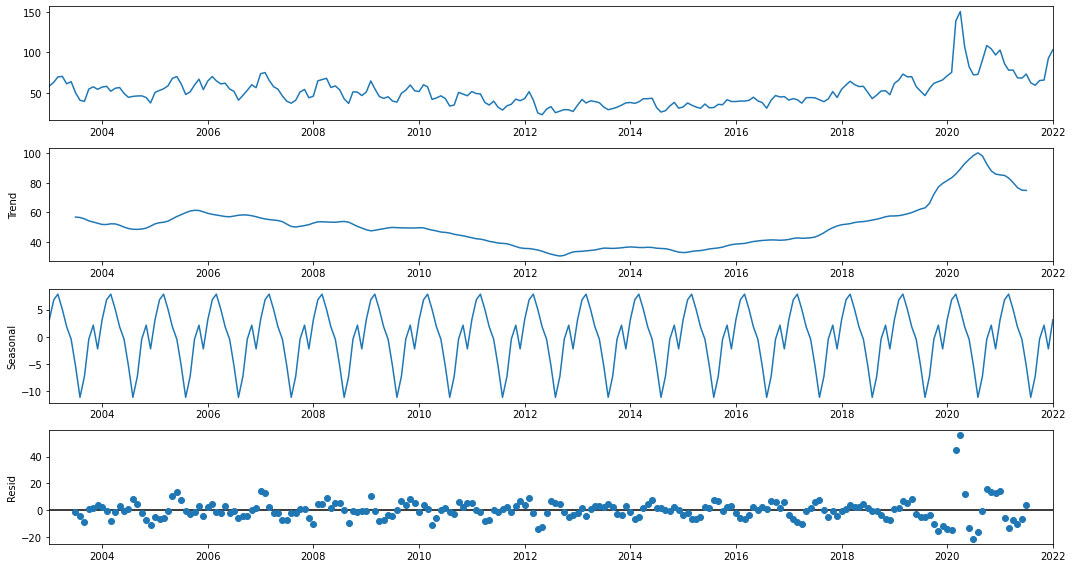

In [22]:
plt.rcParams['figure.figsize']=(15,8)

decomposition=seasonal_decompose(ts_it)
_=decomposition.plot()

### Analisis estacionariedad con adfuller

In [31]:
if adfuller(ts_it)[1] > 0.05:
    print(f'Rechazamos la Ho porque {adfuller(ts_it)[1]} es mayor que 0.05. Por tanto, la señal es estacionaria')
else:
    print("La señal no es estacionaria")

Rechazamos la Ho porque 0.760381113950158 es mayor que 0.05. Por tanto, la señal es estacionaria


### Funciones ACF/PACF

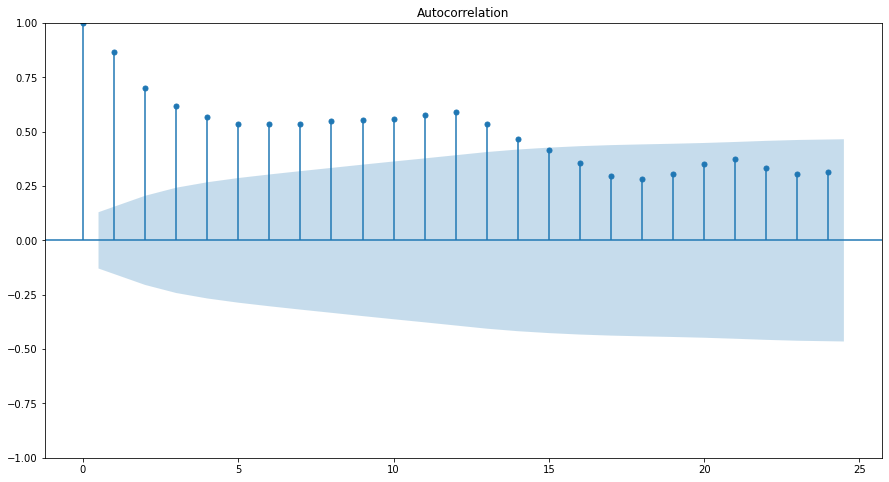

In [33]:
_=plot_acf(ts_it)

In [ ]:
# Se observa estacionaridad de 12 meses

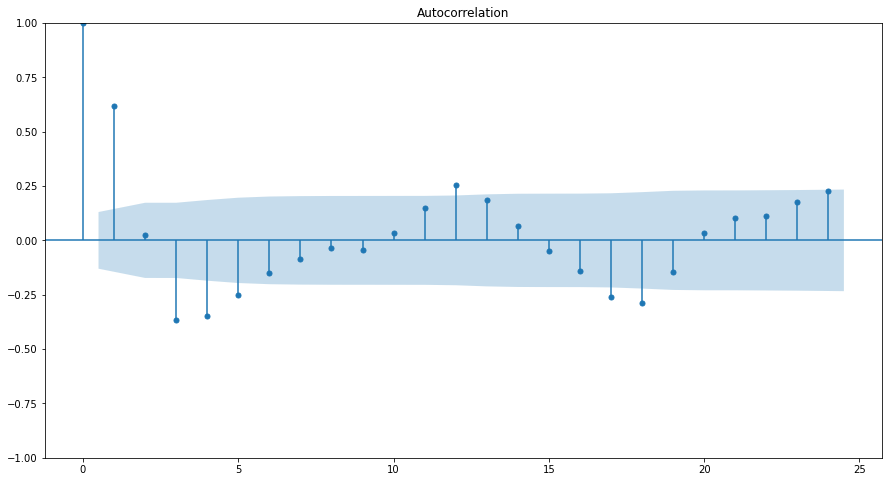

In [35]:
#diferenciación de 3 para ver más clara la estacionalidad
_=plot_acf(ts_it.diff(3).dropna())

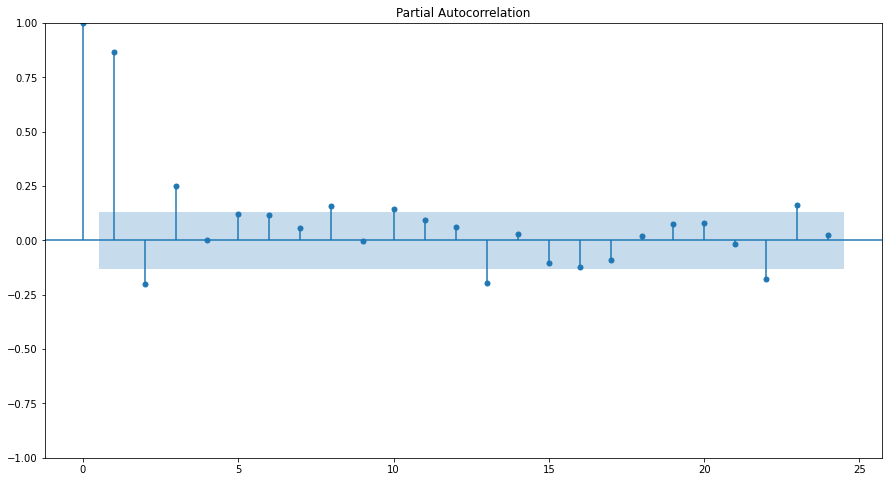

In [37]:
_=plot_pacf(ts_it, method='ywm')

## Selección de modelo

### Modelos sin variables exógenas

#### Autoarima

#### FbProphet

### Modelos con variables exógenas

#### Autoarima

#### FbProphet